

# 🌌 **Quantum SVM for Stock Fraud Detection**
---

In this project, we will learn how to implement Quantum-enhanced Support Vector Machines (QSVM) for stock fraud detection. We will use it to classify the manipulated stocks from genuine ones. The QSVM algorithm is mostly similar to the classical SVM. The  only difference between the two is that QSVM integrates quantum mechanics to replace the kernel method which is used in its classical counterpart. The kernal functions are used to compute the dot product of two feature vectors to find the similarity between them in a higher feature space. The kernel method is replaced here by a quantum feature map and a measure of similarity through various state measurement strategies. This quantum approach promises a potential speedup, especially when dealing with datasets rich in features.

To get a quick overview of classical support vector classifiers, one can read this [blog](https://medium.com/analytics-vidhya/introduction-to-svm-and-kernel-trick-part-1-theory-d990e2872ace). Now, for QSVM, here is a nice [introdution](https://github.com/PatrickHuembeli/QSVM-Introduction)          .

In this project, we will follow a simplified version of the approach described in the paper: [Mixed Quantum–Classical Method for Fraud Detection With Quantum Feature Selection](https://doi.org/10.1109/TQE.2022.3213474). Feature selection is based on the same paper with some modifications and draws the approach from the detailed code for quantum feature selection, as described in the paper, by Christophe Pere which can be viewed on his github repository [here](https://github.com/Christophe-pere/Quantum-Feature-Importance-Selection).

---



---
## 📊 **Dataset Details and objective:**

The dataset we're using is hosted on Kaggle and can be downloaded from this [link](https://www.kaggle.com/datasets/neeoon/flcs-stock-market-transaction-2021-2022?select=flc_2013_2022_notime.csv). It comprises historical data on stock prices and transaction volumes. The dataset consists of 2,170 rows and 7 columns. The columns are named '**open**', '**high**', '**low**', '**close**', '**Volume**', '**Volume MA**', and '**manipulated**'. All columns contain numerical values. The last column, which is our target, has two classes: '**1**' and '**0**'. These represent whether the stock is manipulated or not, respectively. Using the first six columns as features, our algorithm aims to predict the manipulation status of the stock. Our goal is to achieve a recall of 0.9 for class 1, meaning we should accurately detect more than 90 out of every 100 manipulated stocks.




---
## **Libraries**
![NumPy](https://img.shields.io/badge/numpy-%23013243.svg?style=for-the-badge&logo=numpy&logoColor=white) ![Qiskit](https://img.shields.io/badge/Qiskit-%236929C4.svg?style=for-the-badge&logo=Qiskit&logoColor=white)
![Matplotlib](https://img.shields.io/badge/Matplotlib-%23ffffff.svg?style=for-the-badge&logo=Matplotlib&logoColor=black)
![scikit-learn](https://img.shields.io/badge/scikit--learn-%23F7931E.svg?style=for-the-badge&logo=scikit-learn&logoColor=white) ![Pandas](https://img.shields.io/badge/pandas-%23150458.svg?style=for-the-badge&logo=pandas&logoColor=white)

`pandas==1.3.5`

`seaborn==0.12.2`

`imbalanced-learn==0.11`

`scikit-learn==1.1.3`

`matplotlib==3.5.2`

`pylatexenc==2.10`

`qiskit==0.43.3`

`qiskit-aer==0.12.2`

`qiskit-ibm-runtime==0.9.4`

`qiskit-ibmq-provider==0.20.2`

`qiskit-machine-learning==0.6.1`


---

---
## 📚 **Reference**:
- **Title**: [Mixed Quantum–Classical Method for Fraud Detection With Quantum Feature Selection](https://doi.org/10.1109/TQE.2022.3213474)

    M. Grossi *et al.*, "**Mixed Quantum–Classical Method for Fraud Detection With Quantum Feature Selection**," in IEEE Transactions on Quantum Engineering, vol. 3, pp. 1-12, 2022, Art no. 3102812, doi: 10.1109/TQE.2022.3213474.
---




Now, let's start by installing the necessary libraries. It's going to take just a minute.

## **1️⃣ Install and Import necessary libraries**

If you are running this notebook in Google Colab, execute the following cell to install the necessary libraries. For those using a local environment, remove the '!' prefix from the beginning of the command before running it in your environment.

In [ ]:
!pip install imbalanced-learn scikit-learn numpy pylatexenc pandas matplotlib seaborn qiskit qiskit_ibm_runtime qiskit-machine-learning

Now, le's import the necessary libraries and modules.

In [ ]:
import itertools
from typing import Dict, List, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# 2️⃣ Data Preprocessing

### **Importing data**

In [ ]:
%matplotlib inline
df = pd.read_csv('/content/flc_2013_2022_notime.csv', delimiter=';');
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         2170 non-null   float64
 1   high         2170 non-null   float64
 2   low          2170 non-null   float64
 3   close        2170 non-null   float64
 4   Volume       2170 non-null   int64  
 5   Volume MA    2151 non-null   float64
 6   manipulated  2170 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 118.8 KB


,open,high,low,close,Volume,Volume MA,manipulated
0,4104.330818,4176.336622,4032.325014,4104.330818,6158668,NaN,0
1,4104.330818,4104.330818,3960.319210,4032.325014,4937960,NaN,0
2,4032.325014,4104.330818,3960.319210,3960.319210,2287341,NaN,0
3,3960.319210,4032.325014,3888.313406,3960.319210,2425496,NaN,0
4,3960.319210,3960.319210,3816.307603,3816.307603,3534864,NaN,0
...,...,...,...,...,...,...,...
2165,6810.000000,7280.000000,6700.000000,7280.000000,13263200,20884460.0,0
2166,7280.000000,7780.000000,7010.000000,7780.000000,17725500,21608325.0,0
2167,7900.000000,8320.000000,7830.000000,8250.000000,18449000,22442480.0,0
2168,8290.000000,8820.000000,8290.000000,8820.000000,18600200,23277460.0,0


The column 'Volume MA' contains 2151 non-null values. Rest of the values are null which needs to be taken care of. We will fill those values with the mean of all the other values in the column.

### **Filling the null values with mean**

In [ ]:
df['Volume MA'] = df['Volume MA'].fillna(df['Volume MA'].mean())

In [ ]:
df.describe()

,open,high,low,close,Volume,Volume MA,manipulated
count,2170.000000,2170.000000,2170.000000,2170.000000,2.170000e+03,2.170000e+03,2170.000000
mean,6717.912760,6863.198856,6581.406702,6707.506694,1.364422e+07,1.367749e+07,0.012903
std,2893.535984,2986.828914,2807.352002,2900.443175,1.191747e+07,8.081709e+06,0.112883
min,2480.000000,2650.000000,2430.000000,2480.000000,4.404000e+05,2.513635e+06,0.000000
25%,4702.209521,4820.000000,4609.991323,4699.888816,5.550250e+06,7.150989e+06,0.000000
50%,6090.000000,6192.499129,5992.132667,6070.000000,9.917631e+06,1.180333e+07,0.000000
75%,7863.037552,8012.809696,7704.621009,7863.037552,1.805618e+07,1.841428e+07,0.000000
max,23600.000000,24100.000000,21000.000000,22550.000000,1.549412e+08,4.092126e+07,1.000000


In [ ]:
df['manipulated'].value_counts()


0    2142
1      28
Name: manipulated, dtype: int64

## Our dataset is unbalanced with class '**1**' having a minority population. We will balance our training data to ensure that our model performs well.

## **Feature Correlation**

Now let's see how the features are correlated.

In [ ]:
correlation_matrix = df[['open', 'high', 'low', 'close', 'Volume', 'Volume MA']].corr()
print(correlation_matrix)

               open      high       low     close    Volume  Volume MA
open       1.000000  0.998780  0.998700  0.996847  0.498163   0.680242
high       0.998780  1.000000  0.998325  0.998456  0.513615   0.682493
low        0.998700  0.998325  1.000000  0.998295  0.486076   0.676581
close      0.996847  0.998456  0.998295  1.000000  0.501910   0.679159
Volume     0.498163  0.513615  0.486076  0.501910  1.000000   0.614141
Volume MA  0.680242  0.682493  0.676581  0.679159  0.614141   1.000000


<Axes: >

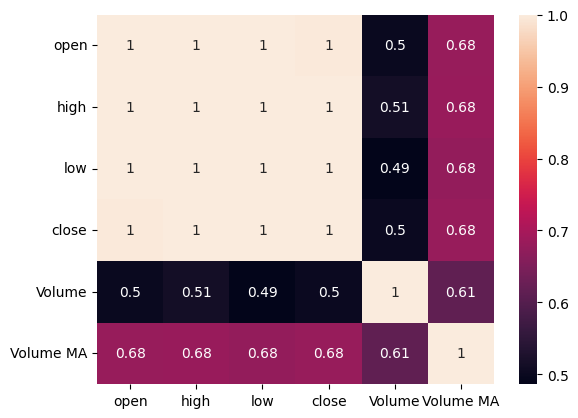

In [ ]:
sns.heatmap(correlation_matrix, annot = True)

We can see that the first four features are highly correlated. So, we will need to examine how many of them need to be incorporated in the model.

## **Pairplots**

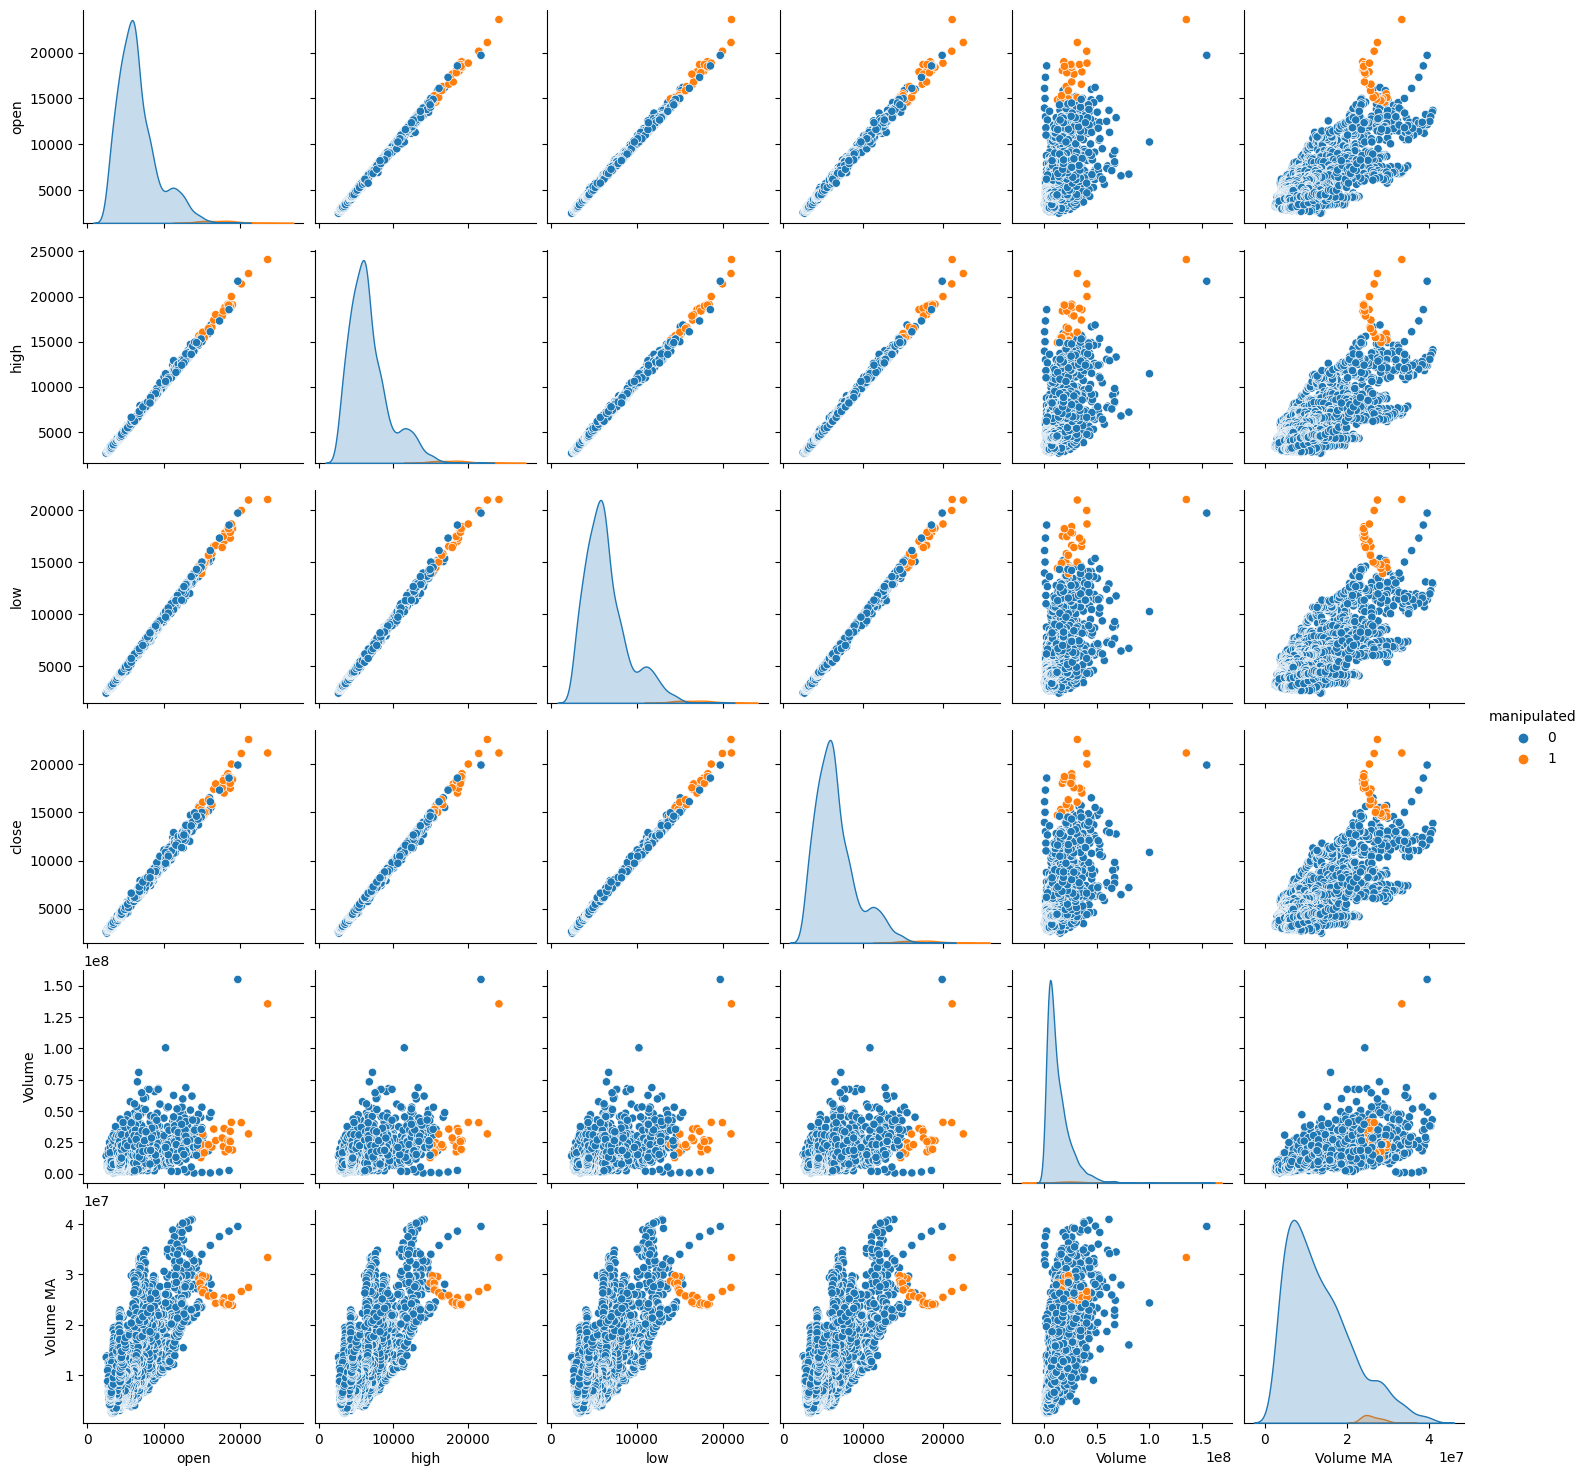

In [ ]:
sns.pairplot(df, hue =    'manipulated')

* Very high correlataion between first four columns.
* Few points with higher value of the 'Volume' feature.

## **Plotting Histograms for DataFrame Columns**

Let's visualize the distribution of data in our DataFrame columns. Specifically, we will be comparing the distribution of all data (in blue) against the distribution of only the "manipulated" data (in red).


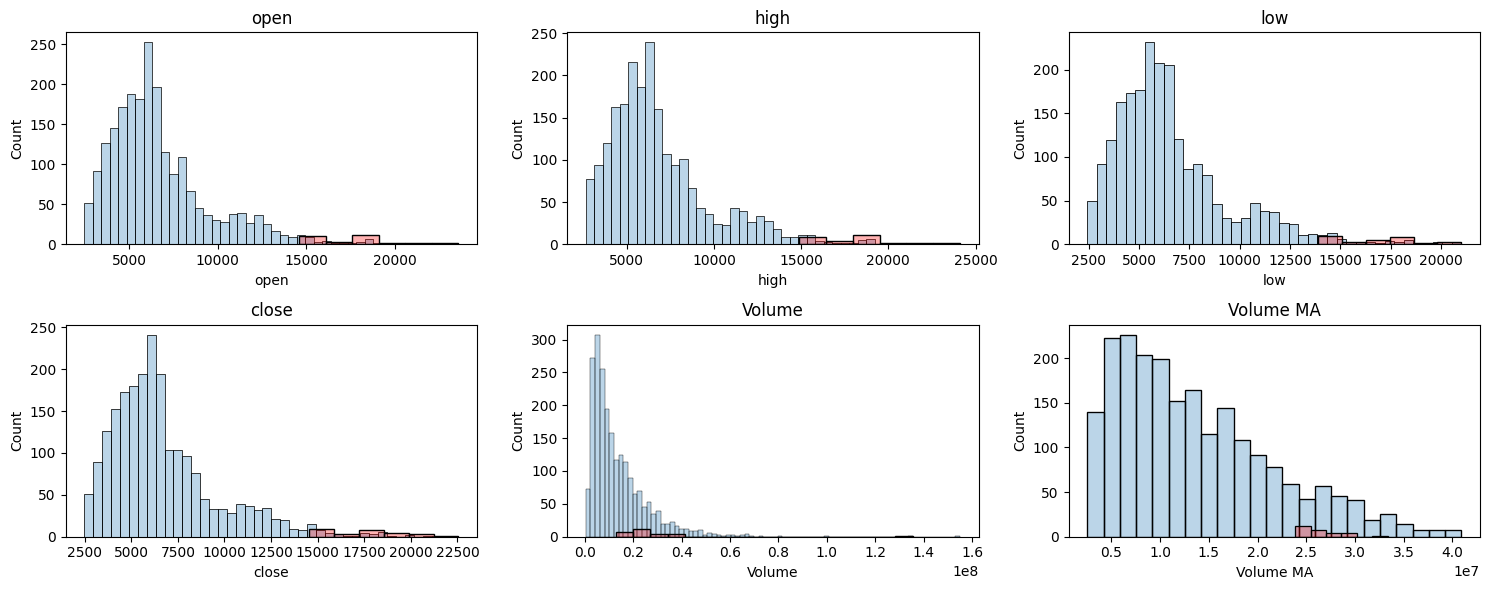

In [ ]:
columns = df.drop('manipulated', axis=1).columns
plt.figure(figsize=(15, 6))

for i, column in enumerate(columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[column], alpha=0.3)  # All data
    sns.histplot(df[df['manipulated'] == 1][column], color='red', alpha=0.3)  # Only manipulated data
    plt.title(column)

plt.tight_layout()
plt.show()

## Removing outliers
Let's remove the outliers based on the 'Volume' column attributes. The four datapoints with very high 'Volume' value can be differentiated from the cluster in the pairplots. Let's drop them.

In [ ]:
df = df.sort_values('Volume', ascending=False).iloc[4:]

## Randomizing data

In [ ]:
seed = 17
randomized_data = df.sample(frac=1, random_state = seed)
randomized_data.head()

,open,high,low,close,Volume,Volume MA,manipulated
1206,5048.074500,5384.612800,4951.920700,5336.535900,19102573,5837221.4,0
656,6020.842591,6110.705913,5841.115946,5930.979269,6574183,9562322.9,0
1689,3250.000000,3250.000000,3010.000000,3010.000000,14741470,6493237.0,0
1291,5250.000000,5340.000000,5230.000000,5250.000000,3080600,7516859.5,0
272,9285.872918,9360.758990,9061.214702,9061.214702,20355947,22253173.2,0


## Define X and y

In [ ]:
x = randomized_data.loc[:,['open','high','low','close','Volume','Volume MA']]
Y = randomized_data.loc[:,'manipulated']

## Split train and test

In [ ]:
X_train,X_test,y_train,y_test = train_test_split( x, Y, test_size=0.3, random_state=80 )

## Checking lablel counts

In [ ]:
y_train.describe(), y_test.describe()
y_train.value_counts(), y_test.value_counts()

(0    1497
 1      19
 Name: manipulated, dtype: int64,
 0    642
 1      8
 Name: manipulated, dtype: int64)

## Standardizing

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

In [ ]:
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index)

## Balancing training data

In [ ]:
smote = SMOTE(sampling_strategy = 1, random_state = 80)
X, y = smote.fit_resample(X_train, y_train)


## 2️⃣ **Implementation of Quantum-enhanced Support Vector Machines**

In [ ]:
from qiskit import *

In [ ]:
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit.providers.basicaer import statevector_simulator
from qiskit_machine_learning.algorithms import QSVC


### ZZFeatureMap

The `ZZFeatureMap` is a quantum feature map inspired by the Quantum Approximate Optimization Algorithm (QAOA). This feature map, implemented in Qiskit, encodes $  n $ inputs $( a_1, \ldots, a_n )$ onto $ n $ qubits. The construction of this feature map's circuit is as follows:

1. **Hadamard Gate Application**: Apply a Hadamard gate to every qubit.
2. **Rotation for Each Qubit**: For each qubit $j $, apply a rotation
$ RZ(2x_j) $
3. **Pairwise Operations**: For every pair of elements $ ( j, k ) $ with $( j < k )$:
   - **Controlled-NOT Gate**: Apply a CNOT gate with qubit $ k$  as the target and qubit $ j $ as the control.
   - **Rotation on Target Qubit**: Apply a rotation
   $ RZ(2(\pi - x_j)(\pi - x_k)) $
   on qubit $ k $.
   - **Repeat CNOT**: Apply the CNOT gate again as in the previous step.

The `ZZFeatureMap` is especially suited for problems where interactions between features are pivotal. This is attributed to its capability to capture high-order correlations between data features by considering all qubit pairs.

**Normalization**: It's vital to note the importance of normalization in the `ZZFeatureMap`. To ensure a balanced representation, variables can be normalized to intervals like
$$ [0, 1] $$
or
$$ [0, 3] $$


Now, let's see how a `ZZFeatureMap` for 3 features looks like. We will draw our circuit with Qiskit.

In [ ]:
from qiskit.circuit.library import ZZFeatureMap

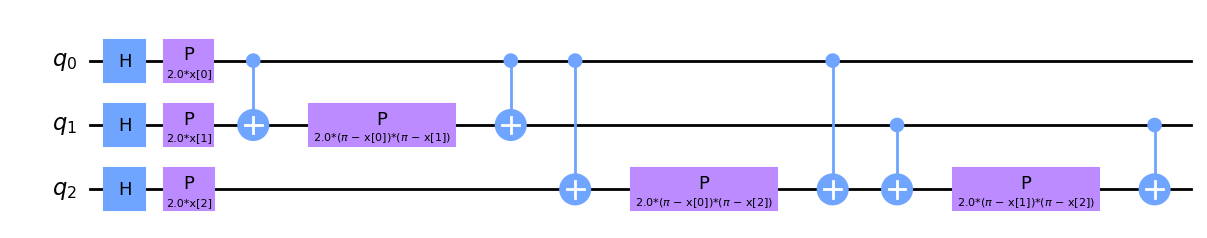

In [ ]:
#zz map for 3 features
feature_dim = 3
zz_ = ZZFeatureMap(feature_dimension=feature_dim, reps=1)

# Draw the circuit
zz_.decompose().draw('mpl')

#                3️⃣ **Quantum feature selection**



In [ ]:

def validate_input_type(data):
    """
    Helper function to validate data type.
    """
    return isinstance(data, (pd.DataFrame,pd.Series, np.ndarray))

def quantum_feature_selection(X_train: Union[pd.DataFrame, np.ndarray], y_train: Union[pd.Series, np.ndarray], X_test: Union[pd.DataFrame, np.ndarray], y_test: Union[pd.Series, np.ndarray]) -> Tuple[float, float]:
    """
    Trains a Quantum SVM on the training data and evaluates its performance on test data.

    Parameters:
    - X_train: Training data features. Accepts pandas DataFrame or numpy ndarray.
    - y_train: Corresponding training data labels. Accepts pandas DataFrame or numpy ndarray.
    - X_test: Test data features. Accepts pandas DataFrame or numpy ndarray.
    - y_test: Corresponding test data labels. Accepts pandas DataFrame or numpy ndarray.

    Returns:
    - bal_acc: Balanced accuracy of the model on the test set.
    - auc: Area under the curve score of the model on the test set.
    """
    if not validate_input_type(X_train) or not validate_input_type(y_train) or not validate_input_type(X_test) or not validate_input_type(y_test):
        raise ValueError("All input datasets should be either pandas.DataFrame or numpy.ndarray")

    try:
        featuremap = ZZFeatureMap(X_train.shape[1])
        qkernel = QuantumKernel(feature_map=featuremap, quantum_instance=backend)
        qsvm = QSVC(quantum_kernel=qkernel)
        qsvm.fit(X_train, y_train)

        predicted_labels = qsvm.predict(X_test)
        bal_acc = balanced_accuracy_score(y_test, predicted_labels)
        auc = roc_auc_score(y_test, predicted_labels)

        return bal_acc, auc
    except Exception as e:
        print(f"Error in quantum_feature_selection: {e}")
        return None, None




## Backend
The research paper in our discussion used statevector simulator for the feature selection. This simulator takes less time and we will also be using it for our work. But, one should be careful while using for more than 10 qubits as it stores the statevectors.

In [ ]:
backend = BasicAer.get_backend('statevector_simulator')

## **Brute force**

In [ ]:

def run_and_log_all_combinations(X: Union[pd.DataFrame, np.ndarray], y: Union[pd.Series, np.ndarray], X_test: Union[pd.DataFrame, np.ndarray], y_test: Union[pd.Series, np.ndarray], feature_names: List[str]) -> str:
    """
    Evaluates different combinations of features using Quantum SVM.

    Parameters:
    - X: Complete training data features. Accepts pandas DataFrame or numpy ndarray.
    - y: Corresponding training data labels. Accepts pandas DataFrame or numpy ndarray.
    - X_test: Complete test data features. Accepts pandas DataFrame or numpy ndarray.
    - y_test: Corresponding test data labels. Accepts pandas DataFrame or numpy ndarray.
    - feature_names: Names of all possible features.

    Returns:
    - best_combination: Best combination of features based on AUC score.
    """
    results = []

    if not validate_input_type(X) or not validate_input_type(y) or not validate_input_type(X_test) or not validate_input_type(y_test):
        raise ValueError("All input datasets should be either pandas.DataFrame or numpy.ndarray")

    if not isinstance(feature_names, list) or not all(isinstance(i, str) for i in feature_names):
        raise ValueError("feature_names should be a list of strings")

    # Try combinations of size 2 to 6
    for r in range(2, 7):
        combinations = itertools.combinations(feature_names, r)

        for comb in combinations:
            if isinstance(X, pd.DataFrame) and isinstance(X_test, pd.DataFrame):
                X_sub = X.loc[:, list(comb)]
                X_test_sub = X_test.loc[:, list(comb)]
            elif isinstance(X, np.ndarray) and isinstance(X_test, np.ndarray):
                X_sub = X[:, [feature_names.index(c) for c in comb]]
                X_test_sub = X_test[:, [feature_names.index(c) for c in comb]]

            bal_acc, auc = quantum_feature_selection(X_sub, y, X_test_sub, y_test)

            if bal_acc is not None and auc is not None:
                results.append({
                    "Combination": ', '.join(comb),
                    "Balanced Accuracy": bal_acc,
                    "AUC": auc
                })
                print(f"For combination {comb}, Balanced Accuracy: {bal_acc}, AUC: {auc}")

    df = pd.DataFrame(results)
    excel_filename = "quantum_feature_selection_all_combinations.xlsx"
    df.to_excel(excel_filename, index=False, engine='openpyxl')

    best_combination_entry = df.sort_values(by='AUC', ascending=False).iloc[0]
    print(f"Best Combination: {best_combination_entry['Combination']}, Balanced Accuracy: {best_combination_entry['Balanced Accuracy']}, AUC: {best_combination_entry['AUC']}")

    return best_combination_entry['Combination']

In [ ]:
all_feature_names = ['open','high','low','close','Volume','Volume MA']

# Run the function
best_combination = run_and_log_all_combinations(X, y, X_test, y_test, all_feature_names)

print(f"The best combination of features is: {best_combination}")

For combination ('open', 'high'), Balanced Accuracy: 0.7971183800623053, AUC: 0.7971183800623053
For combination ('open', 'low'), Balanced Accuracy: 0.7558411214953271, AUC: 0.7558411214953272
For combination ('open', 'close'), Balanced Accuracy: 0.8235981308411215, AUC: 0.8235981308411214
For combination ('open', 'Volume'), Balanced Accuracy: 0.520638629283489, AUC: 0.520638629283489
For combination ('open', 'Volume MA'), Balanced Accuracy: 0.8181464174454829, AUC: 0.8181464174454829
For combination ('high', 'low'), Balanced Accuracy: 0.8463785046728972, AUC: 0.8463785046728973
For combination ('high', 'close'), Balanced Accuracy: 0.8183411214953271, AUC: 0.8183411214953271
For combination ('high', 'Volume'), Balanced Accuracy: 0.46514797507788164, AUC: 0.46514797507788164
For combination ('high', 'Volume MA'), Balanced Accuracy: 0.5767133956386292, AUC: 0.5767133956386293
For combination ('low', 'close'), Balanced Accuracy: 0.7723909657320872, AUC: 0.7723909657320872
For combination 

## **Forward feature selection**

In [ ]:
from itertools import combinations

In [ ]:

def slice_data_based_on_features(X: Union[pd.DataFrame, np.ndarray],
                                 X_test: Union[pd.DataFrame, np.ndarray],
                                 feature_names: List[str],
                                 current_combination: Tuple[str]) -> Tuple[np.ndarray, np.ndarray]:
    """
    Slices the data based on the current combination of features.

    Parameters:
    - X: Complete training data features. Accepts pandas DataFrame or numpy ndarray.
    - X_test: Complete test data features. Accepts pandas DataFrame or numpy ndarray.
    - feature_names: Names of all possible features.
    - current_combination: Current combination of features to slice.

    Returns:
    - X_sub, X_test_sub: Sliced feature matrices for training and test data.
    """

    if isinstance(X, pd.DataFrame) and isinstance(X_test, pd.DataFrame):
        X_sub = X.loc[:, list(current_combination)]
        X_test_sub = X_test.loc[:, list(current_combination)]
    elif isinstance(X, np.ndarray) and isinstance(X_test, np.ndarray):
        X_sub = X[:, [feature_names.index(c) for c in current_combination]]
        X_test_sub = X_test[:, [feature_names.index(c) for c in current_combination]]
    else:
        raise TypeError("X and X_test should be either pandas.DataFrame or numpy.ndarray")

    return X_sub, X_test_sub

def evaluate_two_feature_combinations(X: Union[pd.DataFrame, np.ndarray],
                                      y: Union[pd.Series, np.ndarray],
                                      X_test: Union[pd.DataFrame, np.ndarray],
                                      y_test: Union[pd.Series, np.ndarray],
                                      feature_names: List[str]) -> List[Dict[str, Union[str, float, int]]]:
    """
    Evaluates all possible 2-feature combinations using Quantum SVM.

    Parameters:
    - X: Complete training data features. Accepts pandas DataFrame or numpy ndarray.
    - y: Corresponding training data labels. Accepts pandas DataFrame or numpy ndarray.
    - X_test: Complete test data features. Accepts pandas DataFrame or numpy ndarray.
    - y_test: Corresponding test data labels. Accepts pandas DataFrame or numpy ndarray.
    - feature_names: Names of all possible features.

    Returns:
    - results: List of dictionaries containing combination and its corresponding Balanced Accuracy and AUC scores.
    """

    results = []
    for current_combination in combinations(feature_names, 2):
        X_sub, X_test_sub = slice_data_based_on_features(X, X_test, feature_names, current_combination)
        bal_acc, auc = quantum_feature_selection(X_sub, y, X_test_sub, y_test)
        results.append({
            "Combination": ', '.join(current_combination),
            "Balanced Accuracy": bal_acc,
            "AUC": auc,
            "n_features": 2
        })
    return results




In [ ]:
def run_and_log_all_combinations(X: Union[pd.DataFrame, np.ndarray],
                                 y: Union[pd.Series, np.ndarray],
                                 X_test: Union[pd.DataFrame, np.ndarray],
                                 y_test: Union[pd.Series, np.ndarray],
                                 feature_names: List[str],
                                 excel_filename: str = "quantum_feature_selection_forward_selection.xlsx") -> str:
    """
    Evaluates different combinations of features using Quantum SVM in a forward feature selection manner.

    Parameters:
    - X: Complete training data features. Accepts pandas DataFrame or numpy ndarray.
    - y: Corresponding training data labels. Accepts pandas DataFrame or numpy ndarray.
    - X_test: Complete test data features. Accepts pandas DataFrame or numpy ndarray.
    - y_test: Corresponding test data labels. Accepts pandas DataFrame or numpy ndarray.
    - feature_names: Names of all possible features.
    - excel_filename: Name of the Excel file to save results. Defaults to "quantum_feature_selection_forward_selection.xlsx".

    Returns:
    - best_combination: Best combination of features based on AUC score.
    """

    results = evaluate_two_feature_combinations(X, y, X_test, y_test, feature_names)

    df = pd.DataFrame(results)
    best_combination_entry = df[df['n_features'] == 2].sort_values(by='AUC', ascending=False).iloc[0]
    best_combination = tuple(best_combination_entry['Combination'].split(', '))

    # Printing the best 2-features
    print(f"Best 2-features: {best_combination_entry['Combination']}, AUC: {best_combination_entry['AUC']}")

    remaining_features = set(feature_names) - set(best_combination)

    n_features = 3
    while remaining_features:
        temp_results = []
        for feature in remaining_features:
            current_combination = best_combination + (feature,)
            X_sub, X_test_sub = slice_data_based_on_features(X, X_test, feature_names, current_combination)
            bal_acc, auc = quantum_feature_selection(X_sub, y, X_test_sub, y_test)
            temp_results.append({
                "Combination": ', '.join(current_combination),
                "Balanced Accuracy": bal_acc,
                "AUC": auc,
                "n_features": n_features
            })

        temp_df = pd.DataFrame(temp_results)
        best_feature_entry = temp_df.sort_values(by='AUC', ascending=False).iloc[0]
        best_feature = best_feature_entry['Combination'].split(', ')[-1]
        results.append(best_feature_entry)
        best_combination += (best_feature,)
        remaining_features.remove(best_feature)

        # Printing the best n-features for each n
        print(f"Best {n_features}-features: {best_feature_entry['Combination']}, AUC: {best_feature_entry['AUC']}")

        n_features += 1

    # Save results to Excel file
    df = pd.DataFrame(results)
    df.to_excel(excel_filename, index=False, engine='openpyxl')

    best_combination_entry = pd.DataFrame(results).sort_values(by='AUC', ascending=False).iloc[0]
    return best_combination_entry['Combination']

In [ ]:
all_feature_names = ['open','high','low','close','Volume','Volume MA']

# Run the function
best_combination = run_and_log_all_combinations(X, y, X_test, y_test, all_feature_names)

Best 2-features: high, low, AUC: 0.8463785046728973
Best 3-features: high, low, Volume MA, AUC: 0.9672897196261682
Best 4-features: high, low, Volume MA, close, AUC: 0.7914719626168224
Best 5-features: high, low, Volume MA, close, open, AUC: 0.9281542056074766
Best 6-features: high, low, Volume MA, close, open, Volume, AUC: 0.5570482866043613


### **Selecting the best features**

In [ ]:
best_X = X.loc[:,['high','close','Volume MA']]
y = y

#4️⃣ **Evaluating the QSVM**

In [ ]:
backend = BasicAer.get_backend('qasm_simulator')

In [ ]:
featuremap = ZZFeatureMap(3)

In [ ]:
qkernel = QuantumKernel(feature_map    =   featuremap, quantum_instance          =backend)

In [ ]:
qsvm = QSVC(quantum_kernel = qkernel)

In [ ]:
qsvm.fit(best_X, y)

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.quantum_kernel.QuantumKernel object at 0x7a8f7f33f9a0>,
     random_state=None, shrinking=True, tol=0.001, verbose=False)

In [ ]:
print(classification_report(y_test, qsvm.predict(X_test.loc[:,['high','close','Volume MA']])))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       642
           1       0.18      1.00      0.30         8

    accuracy                           0.94       650
   macro avg       0.59      0.97      0.64       650
weighted avg       0.99      0.94      0.96       650



In [ ]:
qsvm = QSVC( C= 25, quantum_kernel = qkernel)

In [ ]:
qsvm.fit(best_X, y)

QSVC(C=25, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.quantum_kernel.QuantumKernel object at 0x7a8f7f33f9a0>,
     random_state=None, shrinking=True, tol=0.001, verbose=False)

In [ ]:
print(classification_report(y_test, qsvm.predict(X_test.loc[:,['high','close','Volume MA']])))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       642
           1       0.25      1.00      0.40         8

    accuracy                           0.96       650
   macro avg       0.62      0.98      0.69       650
weighted avg       0.99      0.96      0.97       650



## Classical SVM

In [ ]:
svc = SVC( kernel="rbf")

In [ ]:
svc.fit(X[[ 'high', 'Volume', 'Volume MA']], y)

SVC()

In [ ]:
print(classification_report(y_test, svc.predict(X_test[[ 'high', 'Volume', 'Volume MA']])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       642
           1       0.80      1.00      0.89         8

    accuracy                           1.00       650
   macro avg       0.90      1.00      0.94       650
weighted avg       1.00      1.00      1.00       650



# 5️⃣ **Conclusion**

Here, we can see that our QSVM has achieved a 100% recall. But, if we compare it's performance with classical version, the QSVM has been easily outperformed in speed and F1-score.

It's not unexpected because QSVM is not always meant to provide an advantage over SVM. It is believed to provide speedups in future for only a limited type of datasets with large number of features and less amount of data. Also, it was the result of only a single feature map. So, you can explore other feature maps too.

# Work in-process

In [ ]:
def quantum_feature_selection_and_test(X: Union[pd.DataFrame, np.ndarray], y: Union[pd.DataFrame, np.ndarray], X_test: Union[pd.DataFrame, np.ndarray], y_test: Union[pd.DataFrame, np.ndarray]) -> float:
    """Train a quantum SVM on provided data and compute its F1 score."""
    # Validate input data
    if X.shape[0] != y.shape[0] or X_test.shape[0] != y_test.shape[0]:
        raise ValueError("Mismatch in dimensions between data and labels.")

    featuremap = ZZFeatureMap(X.shape[1])
    qkernel = QuantumKernel(feature_map=featuremap, quantum_instance=backend)
    qsvm = QSVC(quantum_kernel=qkernel)

    qsvm.fit(X, y.ravel())
    predicted_labels_test = qsvm.predict(X_test)

    return f1_score(y_test.ravel(), predicted_labels_test, pos_label=1)

def classical_feature_selection_and_test(X: Union[pd.DataFrame, np.ndarray], y: Union[pd.DataFrame, np.ndarray], X_test: Union[pd.DataFrame, np.ndarray], y_test: Union[pd.DataFrame, np.ndarray]) -> float:
    """Train a classical SVM on provided data and compute its F1 score."""
    # Validate input data
    if X.shape[0] != y.shape[0] or X_test.shape[0] != y_test.shape[0]:
        raise ValueError("Mismatch in dimensions between data and labels.")

    svc = SVC(kernel="linear")
    svc.fit(X, y.ravel())
    y_pred_test = svc.predict(X_test)

    return f1_score(y_test.ravel(), y_pred_test, pos_label=1)

def run_and_log_all_combinations(X: Union[pd.DataFrame, np.ndarray], y: Union[pd.DataFrame, np.ndarray], X_test: Union[pd.DataFrame, np.ndarray], y_test: Union[pd.DataFrame, np.ndarray], feature_names: List[str]) -> Tuple[str, str]:
    """Evaluate both quantum and classical SVMs for every combination of provided features and log results."""
    results = []

    for r in range(2, 7):
        combinations = itertools.combinations(feature_names, r)

        for comb in combinations:
            try:
                X_sub = X.loc[:, list(comb)]
                X_test_sub = X_test.loc[:, list(comb)]
                y_sub = y if isinstance(y, np.ndarray) else y.loc[:, list(comb)]
                y_test_sub = y_test if isinstance(y_test, np.ndarray) else y_test.loc[:, list(comb)]

                quantum_f1_test = quantum_feature_selection_and_test(X_sub, y_sub, X_test_sub, y_test_sub)
                classical_f1_test = classical_feature_selection_and_test(X_sub, y_sub, X_test_sub, y_test_sub)

                results.append({
                    "Combination": ', '.join(comb),
                    "Quantum F1 Score (Test)": quantum_f1_test,
                    "Classical F1 Score (Test)": classical_f1_test
                })

                print(f"For combination {comb}, Quantum F1 (Test): {quantum_f1_test}, Classical F1 (Test): {classical_f1_test}")
            except Exception as e:
                print(f"Error occurred for combination {comb}. Error details: {e}")

    df = pd.DataFrame(results)
    excel_filename = "feature_selection_test_combinations.xlsx"
    df.to_excel(excel_filename, index=False, engine='openpyxl')

    best_combination_q_test = df.sort_values(by='Quantum F1 Score (Test)', ascending=False).iloc[0]['Combination']
    best_combination_c_test = df.sort_values(by='Classical F1 Score (Test)', ascending=False).iloc[0]['Combination']

    return best_combination_q_test, best_combination_c_test


In [ ]:
all_feature_names = ['open','high','low','close','Volume','Volume MA']

# Run the function
best_combination = run_and_log_all_combinations(X, y, X_test, y_test, all_feature_names)

print(f"The best combination of features is: {best_combination}")

For combination ('open', 'high'), Balanced Accuracy: 0.7953488372093023, AUC: 0.7953488372093023
For combination ('open', 'low'), Balanced Accuracy: 0.7906976744186047, AUC: 0.7906976744186046
For combination ('open', 'close'), Balanced Accuracy: 0.9124031007751938, AUC: 0.9124031007751938
For combination ('open', 'Volume'), Balanced Accuracy: 0.5701550387596899, AUC: 0.57015503875969
For combination ('open', 'Volume MA'), Balanced Accuracy: 0.7813953488372093, AUC: 0.7813953488372093
For combination ('high', 'low'), Balanced Accuracy: 0.7058139534883721, AUC: 0.7058139534883722
For combination ('high', 'close'), Balanced Accuracy: 0.6542635658914728, AUC: 0.6542635658914729
For combination ('high', 'Volume'), Balanced Accuracy: 0.5562015503875969, AUC: 0.5562015503875969
For combination ('high', 'Volume MA'), Balanced Accuracy: 0.7806201550387597, AUC: 0.7806201550387596
For combination ('low', 'close'), Balanced Accuracy: 0.7236434108527132, AUC: 0.7236434108527132
For combination ('